# 22.02.20

**Author:** Miron Rogovets

---

### Task 1.

<img src="data/task-22.02.jpg" alt="task" width="750"/>

Conduct a factor analysis to see the factor structure if the data, in particular:

1. Interpret the results of KMO and Bartlett’s test.
2. Interpret communalities (cut point 0,3).
3. Give your comments on the cumulative variance explained by the factor model.
4. Interpret the rotated component matrix.
5. Give the names and interpretations for the factors.
6. Save the factors and recode them into ordinal variables with the same scale of measurement as the initial variables.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [137]:
_, meta = pyreadstat.read_dta('data/TOSSE-R.dta')
df = pd.read_stata('data/TOSSE-R.dta')
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
0,5,4,5,6,3,5,6,5,6,3,...,3,5,6,5,4,Strongly Agree,5,5,4,5
1,5,6,5,6,4,5,5,5,5,3,...,3,4,6,5,4,6,5,5,4,5
2,4,6,2,2,2,4,2,2,2,Strongly Disagree,...,2,2,Strongly Disagree,2,2,Strongly Disagree,3,3,2,2
3,4,5,5,5,2,5,6,2,4,5,...,3,4,4,4,3,3,3,4,3,3
4,4,4,3,5,Strongly Disagree,4,5,4,6,4,...,4,4,3,6,2,2,4,3,4,Strongly Disagree


In [138]:
meta.column_names_to_labels

{'q1': "I once woke up in the middle of a vegetable patch hugging a turnip that I'd mist",
 'q2': "If I had a big gun I'd shoot all the students I have to teach",
 'q3': 'I memorize probability values for the F-distribution',
 'q4': 'I worship at the shrine of Pearson',
 'q5': 'I still live with my mother and have little personal hygiene',
 'q6': 'Teaching others makes me want to swallow a large bottle of bleach because the pa',
 'q7': 'Helping others to understand Sums of Squares is a great feeling',
 'q8': 'I like control conditions',
 'q9': 'I calculate 3 ANOVAs in my head before getting out of bed every morning',
 'q10': 'I could spend all day explaining statistics to people',
 'q11': "I like it when people tell me I've helped them to understand factor rotation",
 'q12': 'People fall asleep as soon as I open my mouth to speak',
 'q13': 'Designing experiments is fun',
 'q14': "I'd rather think about appropriate dependent variables than go to the pub",
 'q15': 'I soil my pants with e

In [139]:
print(df.shape)
df.dtypes

(239, 28)


q1     category
q2     category
q3     category
q4     category
q5     category
q6     category
q7     category
q8     category
q9     category
q10    category
q11    category
q12    category
q13    category
q14    category
q15    category
q16    category
q17    category
q18    category
q19    category
q20    category
q21    category
q22    category
q23    category
q24    category
q25    category
q26    category
q27    category
q28    category
dtype: object

In [140]:
print(df.q1.unique())
df.q1.cat.codes.unique()

[5, 4, 3, 6, Strongly Agree, Strongly Disagree, 2]
Categories (7, object): [Strongly Disagree < 2 < 3 < 4 < 5 < 6 < Strongly Agree]


array([4, 3, 2, 5, 6, 0, 1])

In [141]:
df.isna().sum()

q1     0
q2     1
q3     1
q4     0
q5     0
q6     0
q7     0
q8     0
q9     0
q10    0
q11    1
q12    2
q13    0
q14    0
q15    1
q16    0
q17    0
q18    1
q19    1
q20    0
q21    1
q22    0
q23    0
q24    0
q25    0
q26    0
q27    0
q28    0
dtype: int64

The number of missing values is pretty small, so we just drop them.

In [142]:
df.dropna(inplace=True)
df.shape

(231, 28)

Categorical data should be converted to numeric:

In [143]:
data = df.apply(lambda col: col.cat.codes + 1)
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28
0,5,4,5,6,3,5,6,5,6,3,...,3,5,6,5,4,7,5,5,4,5
1,5,6,5,6,4,5,5,5,5,3,...,3,4,6,5,4,6,5,5,4,5
2,4,6,2,2,2,4,2,2,2,1,...,2,2,1,2,2,1,3,3,2,2
3,4,5,5,5,2,5,6,2,4,5,...,3,4,4,4,3,3,3,4,3,3
4,4,4,3,5,1,4,5,4,6,4,...,4,4,3,6,2,2,4,3,4,1


In [144]:
print(data.dtypes.unique())
data.q1.unique()

[dtype('int8')]


array([5, 4, 3, 6, 7, 1, 2])

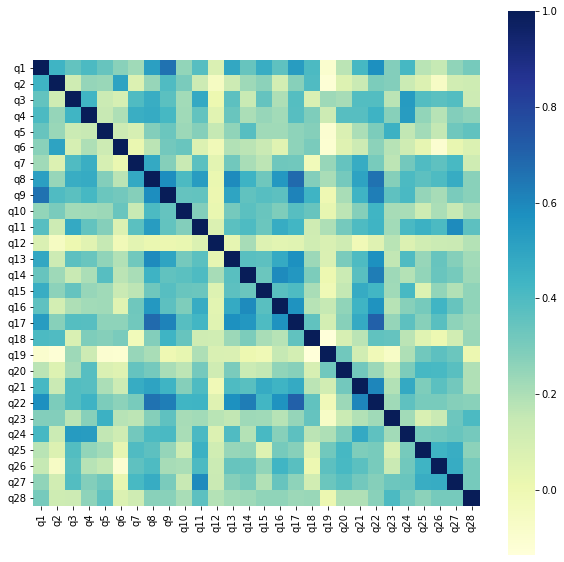

In [145]:
cor = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cor, square = True, cmap='YlGnBu')
plt.show()

In [146]:
stat, p = calculate_bartlett_sphericity(data)
kmo_all, kmo_model = calculate_kmo(data)

In [147]:
stat, p

(3016.473198102612, 0.0)

In this Bartlett ’s test, the <code>p-value = 0</code>. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [148]:
kmo_model

0.893229965770545

The overall KMO for the data is 0.89, which indicates that we can proceed with the factor analysis.

Now we should determine the number of factors.

In [149]:
fa = FactorAnalyzer(n_factors=28, rotation=None)
fa.fit(data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=28, rotation=None, rotation_kwargs={},
               use_smc=True)

In [150]:
ev, v = fa.get_eigenvalues()
ev

array([9.0644867 , 2.78723821, 1.6644181 , 1.51453898, 1.18028053,
       0.99082073, 0.92516137, 0.81859271, 0.79297687, 0.74395445,
       0.70502647, 0.65402799, 0.62266238, 0.57438631, 0.54452343,
       0.51554247, 0.4870737 , 0.45379431, 0.42316997, 0.38170756,
       0.3410759 , 0.33392099, 0.30856705, 0.29288771, 0.2598985 ,
       0.24834928, 0.20673375, 0.16418359])

In [151]:
ev[ev > 1]

array([9.0644867 , 2.78723821, 1.6644181 , 1.51453898, 1.18028053])

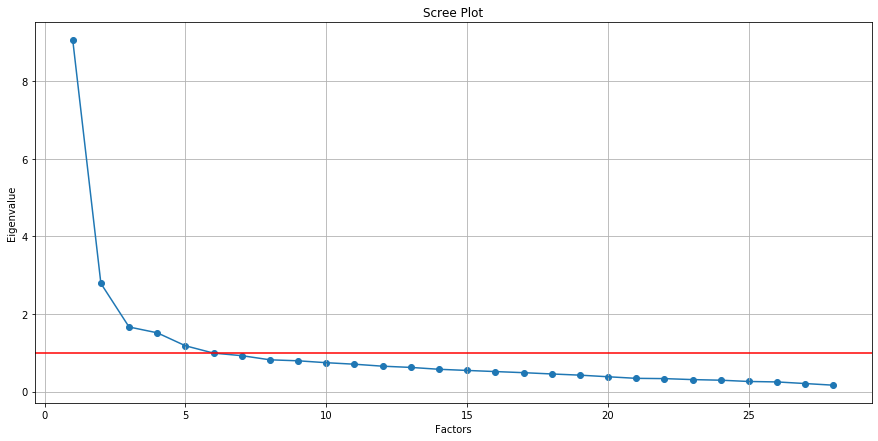

In [152]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, data.shape[1]+1), ev)
plt.plot(range(1,data.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

We can see that only 5 eigenvalues are greater than one, so we need to choose only 5 factors. 

In [153]:
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [154]:
factors = pd.DataFrame(data=fa.loadings_, 
                       index=data.columns, 
                       columns=['Factor_1', 'Factor_2', 'Factor_3', 'Factor_4', 'Factor_5'])
factors

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
q1,0.389146,-0.008990,0.502169,0.385627,0.220176
q2,0.098292,-0.035011,0.108678,0.687793,0.116026
q3,0.153175,0.410950,0.544143,0.082279,0.019091
q4,0.112477,0.333469,0.503879,0.314022,0.068096
q5,0.222030,0.019344,0.077863,0.208018,0.575073
q6,0.099384,-0.022758,0.045220,0.633871,-0.017107
q7,0.199254,0.528631,0.301360,0.034903,-0.002973
q8,0.550094,0.413537,0.334555,0.265445,0.093480
q9,0.410029,0.109936,0.427809,0.464115,0.169145
q10,0.369153,0.100492,0.102143,0.358265,0.119256


In [155]:
communalities = pd.DataFrame(data=fa.get_communalities(), 
                       index=data.columns, 
                       columns=['Communalities'])
communalities

,Communalities
q1,0.600874
q2,0.509219
q3,0.495569
q4,0.480994
q5,0.429714
q6,0.414526
q7,0.411197
q8,0.664742
q9,0.607242
q10,0.299382


In [156]:
communalities[communalities.Communalities < 0.3]

,Communalities
q10,0.299382
q12,0.106746


Only two variables don't fit the model and don't share the common variance

In [157]:
factor_variance = pd.DataFrame(data=fa.get_factor_variance(),
                              index=['Variance', 'Proportional variance', 'Cumulative variance'],
                              columns=factors.columns)
factor_variance

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
Variance,3.933741,3.048230,2.625821,2.259382,1.794345
Proportional variance,0.140491,0.108865,0.093779,0.080692,0.064084
Cumulative variance,0.140491,0.249356,0.343135,0.423828,0.487911


48,7% of variables’ variance is explained by the factor model

In [158]:
fa.rotation_matrix_

array([[ 0.61358223, -0.43482097,  0.30943487,  0.47742701,  0.33280788],
       [ 0.13545759,  0.74176606,  0.09535418, -0.01324716,  0.64974337],
       [-0.37332964, -0.11009888,  0.88599924, -0.24250583,  0.06855277],
       [-0.68192268, -0.16441402, -0.17621026,  0.58458252,  0.36764482],
       [-0.02783026, -0.47070172, -0.28127021, -0.60937851,  0.57202296]])

In [169]:
f1 = factors[factors.idxmax(axis=1) == 'Factor_1'].index.values
f2 = factors[factors.idxmax(axis=1) == 'Factor_2'].index.values
f3 = factors[factors.idxmax(axis=1) == 'Factor_3'].index.values
f4 = factors[factors.idxmax(axis=1) == 'Factor_4'].index.values
f5 = factors[factors.idxmax(axis=1) == 'Factor_5'].index.values

print('First factor: {}'.format(f1))
print('Second factor: {}'.format(f2))
print('Third factor: {}'.format(f3))
print('Fourth factor: {}'.format(f4))
print('Fifth factor: {}'.format(f5))

First factor: ['q8' 'q10' 'q13' 'q14' 'q16' 'q17' 'q21' 'q22']
Second factor: ['q7' 'q11' 'q19' 'q20' 'q25' 'q26' 'q27']
Third factor: ['q1' 'q3' 'q4' 'q15' 'q24']
Fourth factor: ['q2' 'q6' 'q9' 'q18']
Fifth factor: ['q5' 'q12' 'q23' 'q28']


#### Questions from first factor
This group represents professors' interests, especially scientific ones.

In [170]:
for f in f1:
    print(meta.column_names_to_labels[f])

I like control conditions
I could spend all day explaining statistics to people
Designing experiments is fun
I'd rather think about appropriate dependent variables than go to the pub
Thinking about whether to use repeated or independent measures thrills me
I enjoy sitting in the park contemplating whether to use participant observation
Thinking about Bonferroni corrections gives me a tingly feeling in my groin
I quiver with excitement when thinking about designing my next experiment


#### Questions from second factor
Questions from this group represent professors' interaction with students (positive attitude).

In [171]:
for f in f2:
    print(meta.column_names_to_labels[f])

Helping others to understand Sums of Squares is a great feeling
I like it when people tell me I've helped them to understand factor rotation
I like to help students
Passing on knowledge is the greatest gift you can bestow an individual
I love teaching
I spend lots of time helping students
I love teaching because students have to pretend to like me or they'll get bad m


#### Questions from third factor
This group represents the depth of passion for science.

In [172]:
for f in f3:
    print(meta.column_names_to_labels[f])

I once woke up in the middle of a vegetable patch hugging a turnip that I'd mist
I memorize probability values for the F-distribution
I worship at the shrine of Pearson
I soil my pants with excitement at the mere mention of Factor Analysis
I tried to build myself a time machine so that I could go back to the 1930s and


#### Questions from fourth factor
Questions from this group represent negative attitude towards students.

In [173]:
for f in f4:
    print(meta.column_names_to_labels[f])

If I had a big gun I'd shoot all the students I have to teach
Teaching others makes me want to swallow a large bottle of bleach because the pa
I calculate 3 ANOVAs in my head before getting out of bed every morning
Standing in front of 300 people in no way makes me lose control of my bowels


#### Questions from fifth factor
This group represents personal life

In [174]:
for f in f5:
    print(meta.column_names_to_labels[f])

I still live with my mother and have little personal hygiene
People fall asleep as soon as I open my mouth to speak
I often spend my spare time talking to the pigeons ... and even they die of bore
My cat is my only friend
